In [1]:
ls

'[init_pre1.pt].zip'   gpt_dev.ipynb      input.txt       pytorch/
 backprop.txt          gpt_dev2.ipynb     makemore.txt    story.txt
 batchnorm.txt         init_pre1.pt       micrograd.txt   wavenet.txt
 final_result.pt       init_pre1.pt.zip   mlp.txt
 gpt.txt               init_pre1.zip      oton1.pt


In [2]:
!pip3 install numpy --pre torch --force-reinstall --index-url https://download.pytorch.org/whl/nightly/cu117

Looking in indexes: https://download.pytorch.org/whl/nightly/cu117
  Using cached https://download.pytorch.org/whl/nightly/numpy-1.24.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Using cached https://download.pytorch.org/whl/nightly/cu117/torch-2.0.0.dev20230129%2Bcu117-cp39-cp39-linux_x86_64.whl (1826.6 MB)
  Using cached https://download.pytorch.org/whl/nightly/networkx-3.0rc1-py3-none-any.whl (2.0 MB)
  Using cached https://download.pytorch.org/whl/nightly/sympy-1.11.1-py3-none-any.whl (6.5 MB)
  Using cached https://download.pytorch.org/whl/nightly/pytorch_triton-2.0.0%2B0d7e753227-cp39-cp39-linux_x86_64.whl (18.7 MB)
  Using cached https://download.pytorch.org/whl/nightly/typing_extensions-4.4.0-py3-none-any.whl (26 kB)
  Using cached https://download.pytorch.org/whl/nightly/cmake-3.25.0-py2.py3-none-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (23.7 MB)
  Using cached https://download.pytorch.org/whl/nightly/filelock-3.9.0-py3-none-any.whl (9.7 kB)
  U

In [3]:
pip install einops

Note: you may need to restart the kernel to use updated packages.


In [4]:
import torch
import torch.nn as nn
from torch.nn import functional as F
from einops import rearrange

In [5]:
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()
print(text[:100])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You


In [6]:
chars = sorted(list(set(text)))
vocab_size = len(chars)
stoi = {ch: i for i, ch in enumerate(chars)}
itos = {i: ch for i, ch in enumerate(chars)}

encode = lambda s: [stoi[c] for c in s]
decode = lambda l: ''.join([itos[i] for i in l])

In [7]:
# possible that we don't need it.
# I am not sure about that when I am typing it.
import math

In [8]:
# hyperparameters part 1
batch_size = 64 # how many independent sequences will we process in parallel?
block_size = 256 # what is the maximum context length for predictions?
max_iters = 5000
eval_interval = 500
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 512
n_head = 8
n_layer = 6
dropout = 0.0
# # ------------

torch.manual_seed(1337)

In [9]:
data = torch.tensor(encode(text), dtype=torch.long)
ix = torch.randint(len(data) - block_size, (batch_size,))

In [10]:
ix

tensor([ 213173,  989153,  193174,  874116,  231497,  760195,   71893,  938070,
         376266,  672062,  664764,  591480,  977193,  401266,  450648,  852280,
         495115,  176472, 1092875,  373495,  828607,  516138,  758062,  712326,
         738304,  634909,  166352,   49147,   95723,  554568, 1107735,  324303,
         621322,  643369,  449681,  518249,  701743,  769987,  309039,  795116,
         903978,  975656,  386199, 1025017,  980432,   62815,  396895, 1051286,
         447447,  666273,  846830,  558922,  243798, 1044296,  226164,  362227,
         944048,  859913,  987658,  215918,  553352,  585205,  312731,  204832])

In [11]:
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9 * len(data))
train_data = data[:n]
val_data = data[n:]

# data loading
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == "train" else val_data
    ix = torch.randint(len(data)- block_size, (batch_size,))
    x = torch.stack([data[i: i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

In [12]:
@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

In [13]:
# def new_gelu(x):
#     """
#     Implementation of the GELU activation function currently in Google BERT repo (identical to OpenAI GPT).
#     Reference: Gaussian Error Linear Units (GELU) paper: https://arxiv.org/abs/1606.08415
#     """
#     return 0.5 * x * (1.0 + torch.tanh(math.sqrt(2.0 / math.pi) * (x + 0.044715 * torch.pow(x, 3.0))))

In [14]:
torch.zeros((4, 2, 8, 8)) [0,0]

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [15]:
dropout

0.0

In [16]:
li = nn.Linear(n_embd, n_embd*4, bias=False)
li.weight.shape

torch.Size([2048, 512])

In [17]:
class MultiHeadAttention(nn.Module):
    def __init__(self):
        super().__init__()
        self.dropout = nn.Dropout(dropout)
        self.layer1 = nn.Linear(n_embd, n_embd*4, bias = False)
        self.layer2 = nn.Linear(n_embd*4, n_embd, bias = False)
        self.k = self.layer1.weight
        self.v = self.layer2.weight.T
    def forward(self, x):

        B, T, C = x.shape

        att_value = F.gelu(x @ self.k.transpose(-2,-1))
        x =  F.gelu(self.layer1(x))

        y =  self.layer2(x)
        # A little bit different because we did that before the linear layer
        out = self.dropout(y)
        return out

In [18]:
class Block(nn.Module):
    def __init__(self, n_embd, n_head):
        super().__init__()
        head_size = n_embd // n_head
        self.sa = MultiHeadAttention()
    def forward(self, x):
        b = self.sa(x)
        x = x + b
        #This doesn't have one more residual connection compare to the orginal one
        return x

In [41]:
class BigramLanguageModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
        self.position_embedding_table = nn.Embedding(block_size, n_embd)
        self.blocks = nn.Sequential(*[Block(n_embd, n_head = n_head) for _ in range(n_layer)])
        self.lm_head = nn.Linear(n_embd, vocab_size)
        # init all weights
        self.apply(self._init_weights)

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)
            if module.bias is not None:
                torch.nn.init.zeros_(module.bias)
        elif isinstance(module, nn.Embedding):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)
        elif isinstance(module, nn.LayerNorm):
            torch.nn.init.ones_(module.weight)
            if module.bias is not None:
                torch.nn.init.zeros_(module.bias)

    def forward(self, idx, targets = None):
        B, T = idx.shape

        tok_emb = self.token_embedding_table(idx)
        pos_emb = self.position_embedding_table(torch.arange(T, device=device)) # (T,C)
        x = tok_emb + pos_emb
        x = self.blocks(x)
        logits = self.lm_head(x)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)
        return logits, loss
    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # crop idx to the last block_size tokens
            idx_cond = idx[:, -block_size:]
            # get the predictions
            logits, loss = self(idx_cond)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

In [42]:
# hyperparameters part 1
batch_size = 64 # how many independent sequences will we process in parallel?
block_size = 256 # what is the maximum context length for predictions?
max_iters = 5000
eval_interval = 500
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 512
n_head = 8
n_layer = 6
dropout = 0.0
# # ------------

torch.manual_seed(1337)

In [43]:
# xb, yb = get_batch('train')
# xb.get_device(), yb.get_device()

In [44]:
print(device)
model = BigramLanguageModel()
model = model.to(device)
# m = torch.compile(mod01)
print(sum(p.numel() for p in model.parameters())/1e6, 'M parameters')

cuda
12.780609 M parameters


In [45]:
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

In [46]:
for iter in range(max_iters):         #Here 1
    if iter % eval_interval == 0 or iter == max_iters -1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")
    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none = True)
    loss.backward()
    optimizer.step()

# generate from the model
context = torch.zeros((1, 1), dtype=torch.long, device=device)
print(decode(model.generate(context, max_new_tokens=500)[0].tolist()))

step 0: train loss 4.1748, val loss 4.1745
step 500: train loss 2.4704, val loss 2.4993
step 1000: train loss 2.4656, val loss 2.4925
step 1500: train loss 2.4637, val loss 2.4909
step 2000: train loss 2.4636, val loss 2.4924
step 2500: train loss 2.4603, val loss 2.4872
step 3000: train loss 2.4604, val loss 2.4933
step 3500: train loss 2.4590, val loss 2.4908
step 4000: train loss 2.4599, val loss 2.4899
step 4500: train loss 2.4601, val loss 2.4857
step 4999: train loss 2.4585, val loss 2.4927



CEThik brid owindakis s, bt madiset bobe t e.
S:
O: t M:


Leanss:
Wanthar u qur, vet?
F dilasoate awice my.

Thy acom oroup
Yowhthetof is h ble mil ndill, ath iree senghin lat Hetiliovets, and Win nghir.
Thanousel lind te l.
HAshe ce hiry:
Supr aisspllw y. wintoul n Boupetelaves
Momy.
Whod mothakleo Windo whth eisbyo the m dourive ce higend t so mower; te

AN ad nterupt f s ar igis! m:

Thiny aleronth, af Pre?

WISo myound, be!
KENoby ak
Sadsal this ghesthidin cour ay aney Iry ts I fr t ce

It looks like the paper space shut down before the train ended. But the model stuck in the 2.4, which it was worst than the orginal model.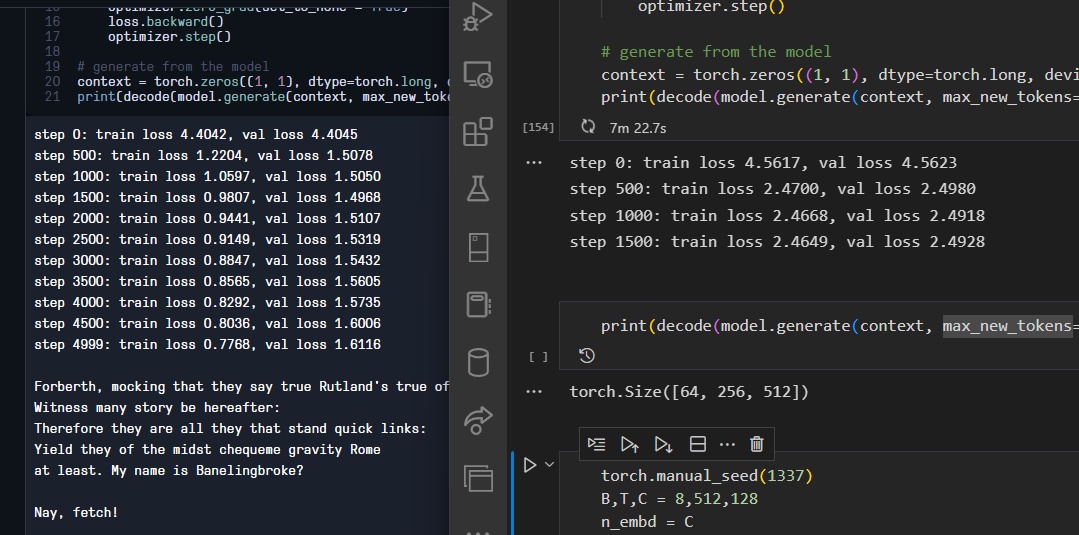

In [47]:
context = torch.zeros((1, 1), dtype=torch.long, device=device)
print(decode(model.generate(context, max_new_tokens=5000)[0].tolist()))


Men pand, bemary.
Yor 'sour mend sora anghy t--pond bethe ten.
Sand tho-me cin s th llety ome.
I muco ffepyotssthecas l.
TAn.
Mourethal wave.
se ed Pe bene ovet aimouthece oros cok hedin tie s turd he te fe f tas ny, ct Clo gscest hes, n ldu he n, soxcharereanthataker aghercobun ws m k s withoumas Fond t s wllo INour id, mersed
Fourd?
TI idurd po venond, d Cattey
K:
BIUSoou, iund thornofen e sutan wiporthare whanot, sitthers, spe Bllellke, oung h O, t pan, ce wat d tive Wout ir f au;

Ankeen ouere rtano itu forealoitoret HEnk;
CKES:
R tck in, d cer t ftanofallon bay ho s, ag llen, meseveminds s; te worimyoin ie--my higre We a wowhedichea blare gofal wisenInirmy a theint de may, the an be ketimyol menat m inor, Reing brwimapise. hawe e wo IICis;
ST:
GR:
Sy'silll whertaperulllalop!
Antheolircte t jura d f t wothrmu th?
Wir; burs s, h n t il c; d junlotir Whth'dlll my ay meras be:
HERGSo n, nbust RIUSE: t l veaban; IOn hend thitan nu t om TESCorte y, d.
Sl!
HAUSTRoy IE:
ARENRO:
BRolers e

It looks like the paper space shut down before the train ended. But the model stuck in the 2.4, which it was worst than the orginal model.

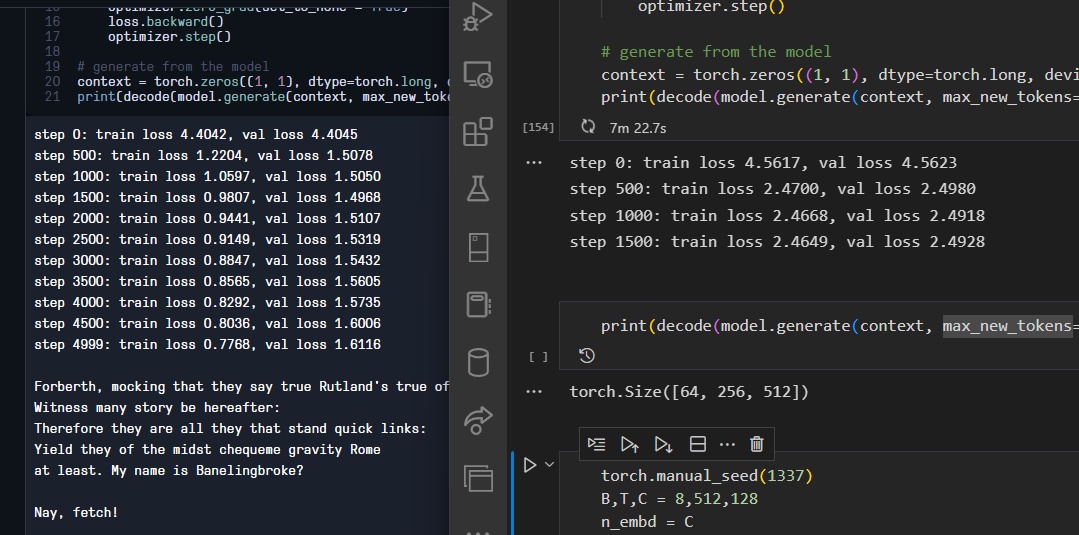

In [120]:
torch.manual_seed(1337)
B,T,C = 8,512,128
n_embd = C
x = torch.randn(B, T, C)
x.shape

torch.Size([8, 512, 128])

In [121]:
layer1 = nn.Linear(C, C*4, bias=False)
layer2 = nn.Linear(C*4, C, bias=False)
k = layer1.weight # key and value are data-independent learnable parameters
v = layer2.weight.T

In [122]:
k.transpose(-2,-1).shape, C, x.shape

(torch.Size([128, 512]), 128, torch.Size([8, 512, 128]))

In [123]:
q1a =  F.gelu(layer1(q))
print(q1a.shape)
q2a =  layer2(q1a)

torch.Size([8, 512, 512])


In [124]:
q1b =  F.gelu(q @ k.transpose(-2,-1))
q2b =  att @ v
q1a.shape, torch.allclose(q1a,q1b), torch.allclose(q2a,q2b)

(torch.Size([8, 512, 512]), True, True)

In [119]:
torch.sum(q2a-q2b)

tensor(534.3660, grad_fn=<SumBackward0>)

In [85]:
q = x # change 1: query is simply the input
k = layer1.weight # key and value are data-independent learnable parameters
v = layer2.weight.T
att = F.gelu(layer1(q)) # change 2: using gelu instead of softmax
print(att.shape)
print(v.shape)
y = att @ v
y.shape

torch.Size([8, 512, 512])
torch.Size([512, 128])


torch.Size([8, 512, 128])

In [240]:
sa1 = MultiHeadAttention()